<a href="https://colab.research.google.com/github/dev0419/DL_Lab/blob/main/l4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


XOR(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (activation1): Sigmoid()
  (linear2): Linear(in_features=2, out_features=1, bias=True)
)
Epoch 0/1000 loss:1.3603326454758644
Epoch 100/1000 loss:0.42188702772546094
Epoch 200/1000 loss:0.2992311706766486
Epoch 300/1000 loss:0.14428502693772316
Epoch 400/1000 loss:0.20177366421557963
Epoch 500/1000 loss:0.005498218673892552
Epoch 600/1000 loss:0.0002983794739748191
Epoch 700/1000 loss:2.9372678733707858e-09
Epoch 800/1000 loss:3.5982328228101323e-13
Epoch 900/1000 loss:1.381839087599701e-12
('linear1.weight', Parameter containing:
tensor([[-5.4547, -5.6857],
        [-2.5240, -2.5344]], device='cuda:0', requires_grad=True))
('linear1.bias', Parameter containing:
tensor([0.9278, 2.6633], device='cuda:0', requires_grad=True))
('linear2.weight', Parameter containing:
tensor([[-2.7088,  2.2802]], device='cuda:0', requires_grad=True))
('linear2.bias', Parameter containing:
tensor([-0.1904], device='cuda:0', requires_grad=T

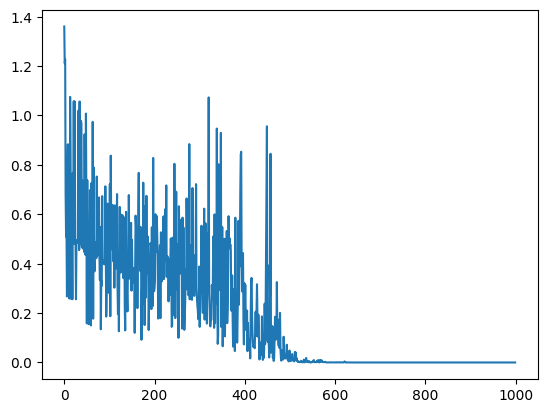

In [33]:
#Q1
import torch
from torch import nn
from torch.utils.data import Dataset,DataLoader
import matplotlib.pyplot as plt
X = torch.tensor([[0,0],[0,1],[1,0],[1,1]],dtype=torch.float32)
y = torch.tensor([0,1,1,0],dtype=torch.float32)

class XOR(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(2,2,bias=True)
        self.activation1 = nn.Sigmoid()
        self.linear2 = nn.Linear(2,1,bias=True)
        #self.activation2 = nn.ReLU()

    def forward(self,x):
        return self.linear2(self.activation1(self.linear1(x)))

class MyDataset(Dataset):
    def __init__(self,X,y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index],self.y[index]

dataset = MyDataset(X,y)
batch_size = 1
dataloader = DataLoader(dataset,batch_size=1,shuffle=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = XOR().to(device)
print(model)
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.5)
epochs = 1000
loss_list = []

def train_one_epoch(epoch_index):
    total_loss = 0.
    for batch in dataloader:
        X_batch,y_batch = batch
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = loss_fn(y_pred.flatten(),y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss/(len(dataloader)*batch_size)

for epoch in range(epochs):
    model.train()
    avg_loss = train_one_epoch(epoch)
    loss_list.append(avg_loss)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs} loss:{avg_loss}")

for params in model.named_parameters():
    print(params)
inp = torch.tensor([[0,0],[0,1],[1,0],[1,1]],dtype=torch.float32).to(device)
model.eval()
output = model(inp)
print(f"Prediction for {inp} is {output}")
plt.plot(range(epochs),loss_list)


XORModel(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (activation1): ReLU()
  (linear2): Linear(in_features=2, out_features=1, bias=True)
  (activation2): ReLU()
)
0/1000, loss: 0.3565910141915083
100/1000, loss: 0.15378627902828157
200/1000, loss: 0.15643179649487138
300/1000, loss: 0.15653943922370672
400/1000, loss: 0.15470720524899662
500/1000, loss: 0.15159197412867798
600/1000, loss: 0.15319393227400724
700/1000, loss: 0.15423225541599095
800/1000, loss: 0.14921619603410363
900/1000, loss: 0.15354166291945148
('linear1.weight', Parameter containing:
tensor([[ 0.6960,  0.7723],
        [-0.7286,  0.7380]], device='cuda:0', requires_grad=True))
('linear1.bias', Parameter containing:
tensor([-0.7850, -0.0665], device='cuda:0', requires_grad=True))
('linear2.weight', Parameter containing:
tensor([[-0.9195,  0.7331]], device='cuda:0', requires_grad=True))
('linear2.bias', Parameter containing:
tensor([0.4975], device='cuda:0', requires_grad=True))
Output for tensor

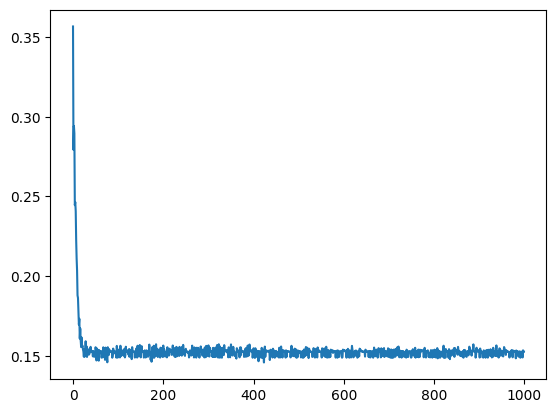

In [37]:
#Q2
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
from torch.utils.data import Dataset, DataLoader

loss_list = []
torch.manual_seed(42)
X = torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype=torch.float32)
Y = torch.tensor([0,1,1,0], dtype=torch.float32)

class XORModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=2, out_features=2, bias=True)
        self.activation1 = nn.ReLU()
        self.linear2 = nn.Linear(in_features=2, out_features=1, bias=True)
        self.activation2 = nn.ReLU()

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        x = self.activation2(x)
        return x

class MyDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

dataset = MyDataset(X, Y)
batch_size = 1
train_data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Check and set device
model = XORModel().to(device)
print(model)

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), 0.1)

def train_one_epoch(epoch_index):
    total_loss = 0
    for i, data in enumerate(train_data_loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to device
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs.flatten(), labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / (len(train_data_loader) * batch_size)

epochs = 1000
for epoch in range(epochs):
    model.train()
    avg_loss = train_one_epoch(epoch)
    loss_list.append(avg_loss)

    if epoch % 100 == 0:
        print(f"{epoch}/{epochs}, loss: {avg_loss}")

for param in model.named_parameters():
    print(param)

input = torch.tensor([[[0,0],[0,1],[1,0],[1,1]]],dtype=torch.float32).to(device)
model.eval()
print(f"Output for {input}: {model(input)}")
plt.plot(loss_list)


Manually computed output for tensor([[0., 1.]]): tensor([[0.8017]])


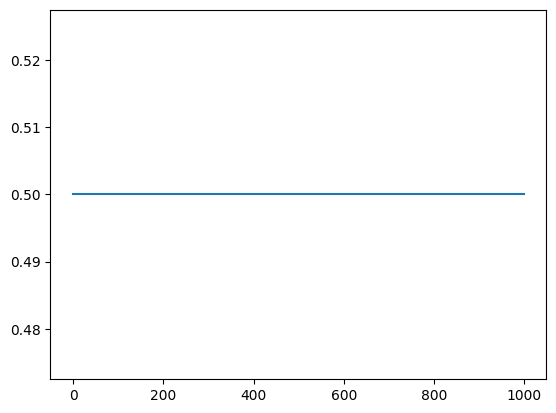

In [35]:
#Q3
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch import nn

weight1 = torch.tensor([[1.0, -1.0], [2.0, -2.0]], dtype=torch.float32)
bias1 = torch.tensor([0.5, -0.5], dtype=torch.float32)
weight2 = torch.tensor([[1.0], [-1.0]], dtype=torch.float32)
bias2 = torch.tensor([0.5], dtype=torch.float32)


class XORModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=2, out_features=2, bias=True)
        self.linear1.weight.data = weight1
        self.linear1.bias.data = bias1
        self.activation1 = nn.Sigmoid()
        self.linear2 = nn.Linear(in_features=2, out_features=1, bias=True)
        self.linear2.weight.data = weight2
        self.linear2.bias.data = bias2

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        return x


X = torch.tensor([[0, 1]], dtype=torch.float32)
linear1_output = torch.matmul(X, weight1.t()) + bias1
activation_output = torch.sigmoid(linear1_output)
final_output = torch.matmul(activation_output, weight2) + bias2  # No need to transpose weight2
print(f"Manually computed output for {X}: {final_output}")
plt.plot(loss_list)
plt.show()


100%|██████████| 9912422/9912422 [00:00<00:00, 91240033.98it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 109229660.80it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 34765801.68it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 18676988.99it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Number of learnable parameters: 109386
Epoch [1/5], Loss: 0.392206146995396
Epoch [2/5], Loss: 0.18875217907972683
Epoch [3/5], Loss: 0.13297088706155002
Epoch [4/5], Loss: 0.10845871042730267
Epoch [5/5], Loss: 0.09445574728778001
Accuracy on test set: 97.31%


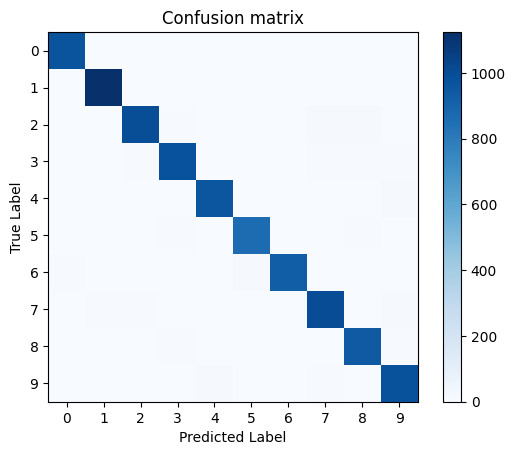

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Define transforms to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize the tensor to range [-1, 1]
])

# Download MNIST dataset and create data loaders
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define neural network model
class FFNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(FFNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, num_classes)

    def forward(self, x):
        x = torch.flatten(x, 1)  # Flatten the input tensor
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model
input_size = 28 * 28  # Size of MNIST images
hidden_size1 = 128
hidden_size2 = 64
num_classes = 10  # Digits 0-9
model = FFNN(input_size, hidden_size1, hidden_size2, num_classes)

# Count the number of learnable parameters
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Number of learnable parameters:", num_params)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in trainloader:
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(trainloader)}")

# Evaluate the model
model.eval()
correct = 0
total = 0
predicted_labels = []
true_labels = []
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
        predicted_labels.extend(predicted.numpy())
        true_labels.extend(labels.numpy())

print(f"Accuracy on test set: {100 * correct / total:.2f}%")

# Plot confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, np.arange(num_classes))
plt.yticks(tick_marks, np.arange(num_classes))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
